<a href="https://colab.research.google.com/github/Sahaj001/Social-Network-Analysis-Lab/blob/main/SNA_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Graph

In [1]:
#@title Importing required dependencies


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import math

Clustering Karate Club Graph using Lovian best partition

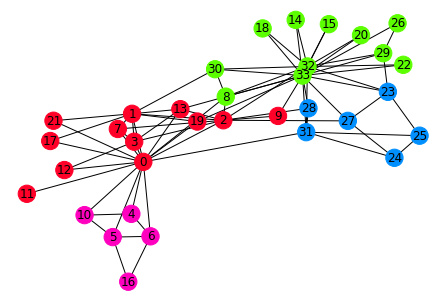

In [3]:
G = nx.karate_club_graph()
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)

# color the nodes according to their partition
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)

nx.draw(G, with_labels = True,node_color=list(partition.values()),cmap = plt.get_cmap('gist_rainbow'))
plt.show()

# Quality Measures


Function for strength between undirected nodes

In [4]:
# strength of node delta(u,v)

def delta(u,v):
  return matrix[u][v]


Partition maps the class of each nodes as predicted by Louvain

In [5]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 3,
 5: 3,
 6: 3,
 7: 0,
 8: 1,
 9: 0,
 10: 3,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 3,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 2,
 24: 2,
 25: 2,
 26: 1,
 27: 2,
 28: 2,
 29: 1,
 30: 1,
 31: 2,
 32: 1,
 33: 1}

Matrix for the Karate Club graph : Original Graph

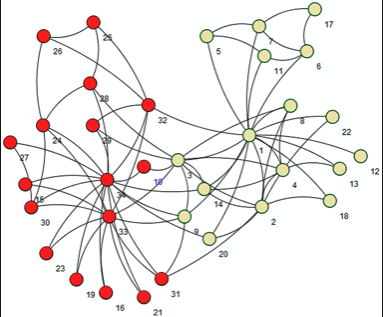

In [6]:
# making the graph matrix from Graph (G)
mat = nx.to_numpy_matrix(G)

In [7]:
# printing the numpy matrix
mat

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

Creating clusters 

In [8]:
cluster = [[],[],[],[]]
for i in partition:
  cluster[partition[i]].append(i)

In [9]:
# Clusters and their nodes
var = 1
for i in cluster:
  print("Cluter ",var,"= ",i) 
  var+=1

Cluter  1 =  [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
Cluter  2 =  [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Cluter  3 =  [23, 24, 25, 27, 28, 31]
Cluter  4 =  [4, 5, 6, 10, 16]


Function for Unifiability between two clusters


---




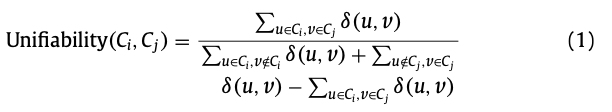

In [10]:
# Unifiability of cluster C(i) and C(j)

def Unifiability(G,Ci,Cj,mat):

  sum1,sum2,sum3 = 0,0,0

  for i in Ci:
    for j in Cj:
      sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      sum2+=int(mat[[i],[j]])
    for j in Cj:
      sum2-=int(mat[[i],[j]])
  
  for i in Cj:
    for j in G:
      sum3+=int(mat[[i],[j]])
    for j in Ci:
      sum3-=int(mat[[i],[j]])

  return sum1/(sum2+sum3-sum1)

In [11]:
# Unifiability between cluster1 and cluster2

Unifiability(G,cluster[0],cluster[1],mat)

0.07368421052631578

Average Unifiability 


---




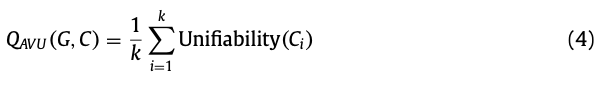

In [12]:
def AVU(G,cluster,mat):
  
  # calling Unifiability for all clusters

  sum_unifiability = 0

  for i in cluster:
    for j in cluster:
      if i!=j:
        sum_unifiability += Unifiability(G,i,j,mat)

  return sum_unifiability/len(cluster)

In [13]:
AVU_G = AVU(G=G,cluster=cluster,mat=mat)

In [14]:
# AVU of graph G
AVU_G

0.1480291638186375

Isolability


---



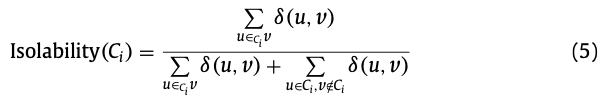

In [15]:
# Isolability of cluster C(i)

def Isolability(G,Ci,mat):

  sum1,sum2 = 0,0

  for i in Ci:
    for j in Ci:
        sum1+=int(mat[[i],[j]])

  for i in Ci:
    for j in G:
      if i!=j:
        sum2+=int(mat[[i],[j]])

  return sum1/(sum1+sum2)

In [16]:
# Isolability of Cluster1
Isolability(G=G,Ci=cluster[0],mat=mat)

0.43636363636363634

Average Isolability


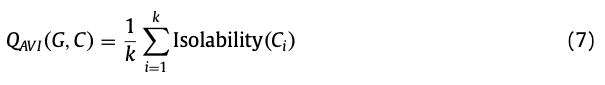

In [17]:
# AVI

def AVI(G,cluster,mat):

  sum = 0
  
  for i in cluster:
    sum += Isolability(G,i,mat)

  return sum/len(cluster)

In [18]:
AVI_G = AVI(G,cluster,mat)

In [19]:
# AVI of graph G

AVI_G

0.4147220081150652

Average Unifiability and Isolability


---



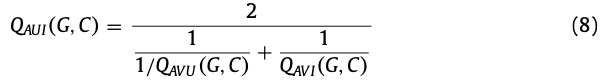

In [20]:
# AUI 

def AUI(G,cluster,mat):
  avi = AVI(G,cluster,mat)
  avu = AVU(G=G,cluster=cluster,mat=mat)
  return (2*avi)/(1+avu*avi)

In [21]:
AUI_G = AUI(G,cluster,mat)

In [22]:
# AUI of graph G

AUI_G

0.7814688966453682

Average Normalized Unifiability and Isolability


---



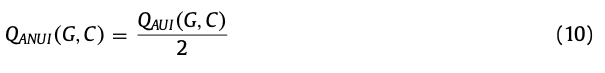

In [23]:
# ANUI

def ANUI(G,cluster,mat):
  return AUI(G,cluster,mat)/2

In [24]:
ANUI_G = ANUI(G,cluster,mat)

In [25]:
# ANUI of graph G

ANUI_G

0.3907344483226841

In [26]:
#@title <h1></h1>
%%html
<marquee style='width: 50%; color: orange;'><b>Modularity : Quality Measure!</b></marquee>



In [27]:
Modularity_G = nx.algorithms.community.quality.modularity(G,communities=cluster)

In [28]:
# Quality measure using Modularity from networkx library of graph G

Modularity_G

0.41880341880341876

True class label of graph 

In [29]:
# original mapping of graph G

truelabel = {0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 0,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1}

# Accuracy Measures

F-measure : Accuracy Measure


---



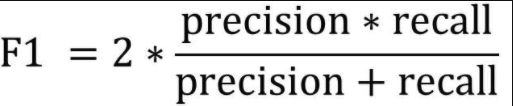

In [30]:
## F-measure
## f-measure  = truepositive/(truepositive + 1/2(falsepositive + falsenegative))

def fmeasure(truelabel,predlabel,G,true,false,ptrue,pfalse):
  
  # truepositive
  tp = 0.0
  for i in G:
    if predlabel[i] == true:
      if truelabel[i] in ptrue:
        tp+=1

  # falsepositive
  fp = 0.0
  for i in G:
    if predlabel[i] == false:
      if truelabel[i] in pfalse:
        fp+=1

  # falsenegative
  fn = 0.0
  for i in G:
    if predlabel[i] == false:
      if not truelabel[i] in ptrue:
        fn+=1
        
  print("tp=",tp," fp=",fp," fn=",fn)
  print("precision = ", tp/(tp+fp))
  print("recall = ", tp/(tp+fn))

  return tp/(tp + 0.5*(fp+fn))

In [31]:
# Using F1-measure on Louvian Partition

fmeasure(truelabel,partition,G,true=1,false=0,ptrue={1,0},pfalse={2,3})

tp= 11.0  fp= 0.0  fn= 0.0
precision =  1.0
recall =  1.0


1.0

Normalized Mutual Information (NMI) : Accuracy Measure

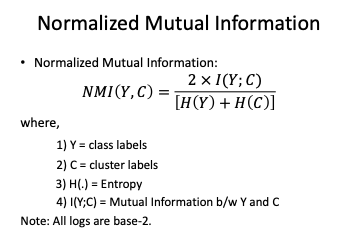

In [32]:
## normalized mutual Information 
## NMI = 2*I(Y;C)/[H(Y)+H(C)]

def NMI(G,truelabel,predlabel,cluster):

  ## Entropy of class label
  prob = {}
  for i in G:
    if truelabel[i] in prob:
      prob[truelabel[i]] += 1.0
    else:
      prob[truelabel[i]] = 0.0

  u = []
  for i in prob:
    u.append(prob[i]/len(G)) 

  hy = 0.0
  for i in u:
    hy += (-i)*(math.log(i,2))

  ## Entropy of cluster label
  prob2 = {}
  for i in G:
    if predlabel[i] in prob2:
      prob2[predlabel[i]] += 1.0
    else:
      prob2[predlabel[i]] = 0.0

  v = []
  for i in prob2:
    v.append(prob2[i]/len(G))


  hc = 0.0
  for i in v:
    hc += (-i)*(math.log(i,2))
  
  print("hy\t:Entropy of class label\t\t\t = ",hy)
  print("hc\t:Entropy of cluster label\t\t = ",hc)

  ## Mutual Information

  
  hyc = 0.0
  for j in cluster:

    p = {}
    p.clear()
    for i in G:
      p[predlabel[i]]=0.0

    for i in j:

      if predlabel[i] == truelabel[i]:
        p[predlabel[i]]+= 1.0


    for i in p:
      p[i]=p[i]/len(j)
    
    temp = 0.0
    for i in p:
      if p[i] != 0:
        hyc -= p[i]*(math.log(p[i],2))

  iyc = hy -hyc
  print("hyc\t:Entropy of class label within cluster\t = ",hyc)
  print("iyc\t:Mutual Information\t\t\t = ",iyc)
  return print("\nNMI  = ",(2*iyc)/(hy+hc))

In [33]:
# value of NMI for Louvian clustering of graph G

NMI(G,truelabel,partition,cluster)

hy	:Entropy of class label			 =  1.023494438823849
hc	:Entropy of cluster label		 =  1.8159181179173376
hyc	:Entropy of class label within cluster	 =  0.2400731786525692
iyc	:Mutual Information			 =  0.7834212601712798

NMI  =  0.5518192545224339
